In [5]:
! pip install smolagents

  Using cached smolagents-1.15.0-py3-none-any.whl.metadata (15 kB)
Using cached smolagents-1.15.0-py3-none-any.whl (124 kB)


In [1]:
from openai import OpenAI
from typing import  Optional, List
from dotenv import load_dotenv, find_dotenv
import os
from heapq import heappush,heapify
import ast
from smolagents._function_type_hints_utils import get_json_schema

In [2]:
load_dotenv(find_dotenv())

True

In [3]:
client = OpenAI(api_key=os.getenv('OPENAI_API_KEY'))

In [4]:
def push_heap(heap: List[tuple], item: tuple)->str:
        """This function is used for pushing element in the heap
        Args:
            heap: this is the collection of items arranged as heap
            item: this is the tuple conataining (f,g,x_coordinate,y_coordinate)
        Returns:
            `str`: output is a string 'done' or 'not done'
        """
        pass
    
def pop_heap(heap: List[tuple],item: tuple)->str:
    """This function is used for popping out element from heap
    Args:
        heap: this is the collection of items arranged as heap.
        item: this is the tuple containing (f,g,x_coordinate,y_coordinate).
    Returns:
        `str`: output is a string 'done' or 'item not found'.
    """
    pass

def add_visited(i: int, j: int)->str:
    """this function is used for marking the node as visited
    Args:
        i: this is the x_coordinate of the node
        j: this is the y_coordonate of the node
    Returns:
        `str`: output is a string 'done' or 'not done'
    """
    pass
def check_closed_list(i: int, j: int)->bool:
    """this function is used for checking whether the current node is in the closed list
    Args:
        i: this is the x_coordinate of the node
        j: this is the y_coordonate of the node
    Returns:
        `bool`: returns a boolean True(if node present in the closed list) or False(if the node is not present in the heap)
    """
    pass

def calculate_cost(i: int, j: int, parent: tuple)->str:
     """This function is used for calculating the cost of the current node
    Args:
        i: this is the x_coordinate of the current node
        j: this is the y_coordinate of the current node
        parent: this is the parent node (x_parent,y_parent) of the current node
    Returns:
        `str`: output is a string containing f,g and h cost
     """
     pass
    

def update_cell_details(i: int, j: int,f_new:int, g_new:int,h_new:int,parent_i:int,parent_j:int)->str:
     """this function is used for updating the cell information
     Args:
        i: x_coordinate of the current node
        j: y_coordinate of the current node
        f_new: total estimated cost of the the current node
        g_new: it is the total cost of reaching the current node
        h_new: it is the heuristic cost of the current node
        parent_i: x_coordinate of the parent node
        parent_j: y_coordinate of the parent node
    Returns:
        `str`: this returns a string 'done' or 'not done'
     """
     pass
    

def trace_path()->str:
    """this function used for finding the shortest path of the graph exploration if exists
    Returns:
        `str`: this function returns a string containing path
    """
    pass

In [5]:
tool_names=[push_heap,pop_heap,add_visited,check_closed_list,calculate_cost,update_cell_details,trace_path]
tools_list=[get_json_schema(f) for f in tool_names]
print(tools_list)

[{'type': 'function', 'function': {'name': 'push_heap', 'description': 'This function is used for pushing element in the heap', 'parameters': {'type': 'object', 'properties': {'heap': {'type': 'array', 'items': {'type': 'object'}, 'description': 'this is the collection of items arranged as heap'}, 'item': {'type': 'object', 'description': 'this is the tuple conataining (f,g,x_coordinate,y_coordinate)'}}, 'required': ['heap', 'item']}, 'return': {'type': 'string', 'description': "output is a string 'done' or 'not done'"}}}, {'type': 'function', 'function': {'name': 'pop_heap', 'description': 'This function is used for popping out element from heap', 'parameters': {'type': 'object', 'properties': {'heap': {'type': 'array', 'items': {'type': 'object'}, 'description': 'this is the collection of items arranged as heap.'}, 'item': {'type': 'object', 'description': 'this is the tuple containing (f,g,x_coordinate,y_coordinate).'}}, 'required': ['heap', 'item']}, 'return': {'type': 'string', 'd

In [ ]:
system_prompt="""Your task is to role-play a particular type of search algorithm.

To help you mimic this algorithm successfully, you will be provided few-shot examples. Study these examples carefully to learn how to mimic the algorithm successfully.
You must adhere to the reasoning style and choice of words in these few-shot examples. Do not use any new words that aren't present in the few-shot examples.

If at any point, you think that you have found the final solution (i.e., the search is over), call the trace_path function. if you fail to find the path return final_path=None Do not fail to do this.
Available Actions you can take. Carefully read the descriptions of the functions specially the calculate_cost function:
push_heap:
    This function is used for pushing element in the heap
        Args:
            heap: this is the collection of items arranged as heap
            item: this is the tuple conataining (f,g,x_coordinate,y_coordinate)
        Returns:
            `str`: output is a string 'done' or 'not done'

pop_heap:
    This function is used for popping out element from heap
        Args:
            heap: this is the collection of items arranged as heap.
            item: this is the tuple containing (f,g,x_coordinate,y_coordinate).
        Returns:
            `str`: output is a string 'done' or 'item not found'.

add_visited:
    this function is used for marking the node as visited
    Args:
        i: this is the x_coordinate of the node
        j: this is the y_coordonate of the node
    Returns:
        `str`: output is a string 'done' or 'not done'

check_closed_list:
    this function is used for checking whether the current node is in the closed list
    Args:
        i: this is the x_coordinate of the node
        j: this is the y_coordonate of the node
    Returns:
        `bool`: returns a boolean True(if node present in the closed list) or False(if the node is not present in the heap)

calculate_cost:
    This function is used for calculating the cost of the current node
    Args:
        i: this is the x_coordinate of the current node
        j: this is the y_coordinate of the current node
        parent: this is the parent node (x_parent,y_parent) of the current node
    Returns:
        `str`: output is a string containing f,g and h cost

check_cost:
    this function is used for checking the current cost of the node
    Args:
        i: this is the x_coordinate of the current node
        j: this is the y_coordinate of the current node
    Returns:
        `int`: returns the current finite or infinite cost of the current child node

update_cell_details:
    this function is used for updating the cell information
     Args:
        i: x_coordinate of the current node
        j: y_coordinate of the current node
        f_new: total estimated cost of the the current node
        g_new: it is the total cost of reaching the current node    
        h_new: it is the heuristic cost of the current node
        parent_i: x_coordinate of the parent node
        parent_j: y_coordinate of the parent node
    Returns:
        `str`: this returns a string 'done' or 'not done'

trace_path:
    this function used for finding the shortest path of the graph exploration if exists
    Returns:
        `str`: this function returns a string containing path
"""

In [7]:
messages_success=[{"role":"system","content":system_prompt},{'role': 'user',
  'content': 'graph={(0, 0): [(0, 1)], (0, 1): [(0, 0), (0, 2)], (0, 2): [(1, 2), (0, 1), (0, 3)], (0, 3): [(0, 2), (0, 4)], (0, 4): [(0, 3), (0, 5)], (0, 5): [(0, 4)], (1, 2): [(0, 2)], (1, 6): [(2, 6)], (2, 0): [(3, 0)], (2, 6): [(1, 6), (3, 6), (2, 7)], (2, 7): [(3, 7), (2, 6), (2, 8)], (2, 8): [(3, 8), (2, 7)], (3, 0): [(2, 0), (3, 1)], (3, 1): [(4, 1), (3, 0), (3, 2)], (3, 2): [(4, 2), (3, 1)], (3, 4): [(4, 4), (3, 5)], (3, 5): [(4, 5), (3, 4), (3, 6)], (3, 6): [(2, 6), (4, 6), (3, 5), (3, 7)], (3, 7): [(2, 7), (4, 7), (3, 6), (3, 8)], (3, 8): [(2, 8), (3, 7)], (4, 1): [(3, 1), (5, 1), (4, 2)], (4, 2): [(3, 2), (4, 1), (4, 3)], (4, 3): [(4, 2), (4, 4)], (4, 4): [(3, 4), (4, 3), (4, 5)], (4, 5): [(3, 5), (5, 5), (4, 4), (4, 6)], (4, 6): [(3, 6), (5, 6), (4, 5), (4, 7)], (4, 7): [(3, 7), (5, 7), (4, 6)], (5, 0): [(6, 0), (5, 1)], (5, 1): [(4, 1), (5, 0)], (5, 5): [(4, 5), (5, 6)], (5, 6): [(4, 6), (6, 6), (5, 5), (5, 7)], (5, 7): [(4, 7), (6, 7), (5, 6), (5, 8)], (5, 8): [(6, 8), (5, 7)], (6, 0): [(5, 0), (7, 0)], (6, 3): [(7, 3)], (6, 6): [(5, 6), (7, 6), (6, 7)], (6, 7): [(5, 7), (7, 7), (6, 6), (6, 8)], (6, 8): [(5, 8), (6, 7), (6, 9)], (6, 9): [(6, 8)], (7, 0): [(6, 0), (8, 0), (7, 1)], (7, 1): [(7, 0), (7, 2)], (7, 2): [(7, 1), (7, 3)], (7, 3): [(6, 3), (8, 3), (7, 2), (7, 4)], (7, 4): [(8, 4), (7, 3)], (7, 6): [(6, 6), (7, 7)], (7, 7): [(6, 7), (8, 7), (7, 6)], (8, 0): [(7, 0), (9, 0)], (8, 3): [(7, 3), (8, 4)], (8, 4): [(7, 4), (8, 3), (8, 5)], (8, 5): [(9, 5), (8, 4)], (8, 7): [(7, 7), (8, 8)], (8, 8): [(9, 8), (8, 7), (8, 9)], (8, 9): [(8, 8)], (9, 0): [(8, 0), (9, 1)], (9, 1): [(9, 0), (9, 2)], (9, 2): [(9, 1)], (9, 5): [(8, 5), (9, 6)], (9, 6): [(9, 5)], (9, 8): [(8, 8)]}'},
 {'role': 'assistant',
  'content': 'graph={(0, 0): [(0, 1)], (0, 1): [(0, 0), (0, 2)], (0, 2): [(1, 2), (0, 1), (0, 3)], (0, 3): [(0, 2), (0, 4)], (0, 4): [(0, 3), (0, 5)], (0, 5): [(0, 4)], (1, 2): [(0, 2)], (1, 6): [(2, 6)], (2, 0): [(3, 0)], (2, 6): [(1, 6), (3, 6), (2, 7)], (2, 7): [(3, 7), (2, 6), (2, 8)], (2, 8): [(3, 8), (2, 7)], (3, 0): [(2, 0), (3, 1)], (3, 1): [(4, 1), (3, 0), (3, 2)], (3, 2): [(4, 2), (3, 1)], (3, 4): [(4, 4), (3, 5)], (3, 5): [(4, 5), (3, 4), (3, 6)], (3, 6): [(2, 6), (4, 6), (3, 5), (3, 7)], (3, 7): [(2, 7), (4, 7), (3, 6), (3, 8)], (3, 8): [(2, 8), (3, 7)], (4, 1): [(3, 1), (5, 1), (4, 2)], (4, 2): [(3, 2), (4, 1), (4, 3)], (4, 3): [(4, 2), (4, 4)], (4, 4): [(3, 4), (4, 3), (4, 5)], (4, 5): [(3, 5), (5, 5), (4, 4), (4, 6)], (4, 6): [(3, 6), (5, 6), (4, 5), (4, 7)], (4, 7): [(3, 7), (5, 7), (4, 6)], (5, 0): [(6, 0), (5, 1)], (5, 1): [(4, 1), (5, 0)], (5, 5): [(4, 5), (5, 6)], (5, 6): [(4, 6), (6, 6), (5, 5), (5, 7)], (5, 7): [(4, 7), (6, 7), (5, 6), (5, 8)], (5, 8): [(6, 8), (5, 7)], (6, 0): [(5, 0), (7, 0)], (6, 3): [(7, 3)], (6, 6): [(5, 6), (7, 6), (6, 7)], (6, 7): [(5, 7), (7, 7), (6, 6), (6, 8)], (6, 8): [(5, 8), (6, 7), (6, 9)], (6, 9): [(6, 8)], (7, 0): [(6, 0), (8, 0), (7, 1)], (7, 1): [(7, 0), (7, 2)], (7, 2): [(7, 1), (7, 3)], (7, 3): [(6, 3), (8, 3), (7, 2), (7, 4)], (7, 4): [(8, 4), (7, 3)], (7, 6): [(6, 6), (7, 7)], (7, 7): [(6, 7), (8, 7), (7, 6)], (8, 0): [(7, 0), (9, 0)], (8, 3): [(7, 3), (8, 4)], (8, 4): [(7, 4), (8, 3), (8, 5)], (8, 5): [(9, 5), (8, 4)], (8, 7): [(7, 7), (8, 8)], (8, 8): [(9, 8), (8, 7), (8, 9)], (8, 9): [(8, 8)], (9, 0): [(8, 0), (9, 1)], (9, 1): [(9, 0), (9, 2)], (9, 2): [(9, 1)], (9, 5): [(8, 5), (9, 6)], (9, 6): [(9, 5)], (9, 8): [(8, 8)]}\nsrc=(9, 2)\ndest=(7, 2)\nheap=[]\npushing start node in the heap\nAction: push_heap(heap=heap,item=(0,0,9,2))'},
 {'role': 'user',
  'content': 'observation: heap = [(0, 0, 9, 2)]\ninitializing the search:'},
 {'role': 'assistant',
  'content': 'selecting the node from the heap with lowest cost\nf=0,g=0,node=(9,2)\nAction: pop_heap(heap=heap,item=(0,0,9,2))'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'adding node to visited\nAction: add_visited(i=9,j=2)'},
 {'role': 'user', 'content': 'observation: done\nexploring the child nodes'},
 {'role': 'assistant',
  'content': 'child node is (9, 1)\nAction: check_closed_list(i=9,j=1)'},
 {'role': 'user', 'content': 'observation: False'},
 {'role': 'assistant',
  'content': 'child node is not visited till now\nAction: calculate_cost(i=9,j=1,parent=(9,2))'},
 {'role': 'user', 'content': 'observation: h_new=3, g_new=1, f_new=4'},
 {'role': 'assistant',
  'content': 'checking the current cost of the node\nAction: check_cost(i=9,j=1)'},
 {'role': 'user', 'content': 'observation: inf'},
 {'role': 'assistant',
  'content': 'cost of the current node is less than the previous cost. pushing this node into heap\nAction: push_heap(heap=heap,item=(4,1,9,1))'},
 {'role': 'user', 'content': 'observation: heap=[(4, 1, 9, 1)]'},
 {'role': 'assistant',
  'content': 'updating the cell details\nAction: update_cell_details(i=9,j=1,f_new=4,g_new=1,h_new=3,parent_i=9,parent_j=2)'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'selecting the node from the heap with lowest cost\nf=4,g=1,node=(9,1)\nAction: pop_heap(heap=heap,item=(4,1,9,1))'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'adding node to visited\nAction: add_visited(i=9,j=1)'},
 {'role': 'user', 'content': 'observation: done\nexploring the child nodes'},
 {'role': 'assistant',
  'content': 'child node is (9, 0)\nAction: check_closed_list(i=9,j=0)'},
 {'role': 'user', 'content': 'observation: False'},
 {'role': 'assistant',
  'content': 'child node is not visited till now\nAction: calculate_cost(i=9,j=0,parent=(9,1))'},
 {'role': 'user', 'content': 'observation: h_new=4, g_new=2, f_new=6'},
 {'role': 'assistant',
  'content': 'checking the current cost of the node\nAction: check_cost(i=9,j=0)'},
 {'role': 'user', 'content': 'observation: inf'},
 {'role': 'assistant',
  'content': 'cost of the current node is less than the previous cost. pushing this node into heap\nAction: push_heap(heap=heap,item=(6,2,9,0))'},
 {'role': 'user', 'content': 'observation: heap=[(6, 2, 9, 0)]'},
 {'role': 'assistant',
  'content': 'updating the cell details\nAction: update_cell_details(i=9,j=0,f_new=6,g_new=2,h_new=4,parent_i=9,parent_j=1)'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'child node is (9, 2)\nAction: check_closed_list(i=9,j=2)'},
 {'role': 'user', 'content': 'observation: True'},
 {'role': 'assistant',
  'content': 'child node is already visited so continuing'},
 {'role': 'assistant',
  'content': 'selecting the node from the heap with lowest cost\nf=6,g=2,node=(9,0)\nAction: pop_heap(heap=heap,item=(6,2,9,0))'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'adding node to visited\nAction: add_visited(i=9,j=0)'},
 {'role': 'user', 'content': 'observation: done\nexploring the child nodes'},
 {'role': 'assistant',
  'content': 'child node is (8, 0)\nAction: check_closed_list(i=8,j=0)'},
 {'role': 'user', 'content': 'observation: False'},
 {'role': 'assistant',
  'content': 'child node is not visited till now\nAction: calculate_cost(i=8,j=0,parent=(9,0))'},
 {'role': 'user', 'content': 'observation: h_new=3, g_new=3, f_new=6'},
 {'role': 'assistant',
  'content': 'checking the current cost of the node\nAction: check_cost(i=8,j=0)'},
 {'role': 'user', 'content': 'observation: inf'},
 {'role': 'assistant',
  'content': 'cost of the current node is less than the previous cost. pushing this node into heap\nAction: push_heap(heap=heap,item=(6,3,8,0))'},
 {'role': 'user', 'content': 'observation: heap=[(6, 3, 8, 0)]'},
 {'role': 'assistant',
  'content': 'updating the cell details\nAction: update_cell_details(i=8,j=0,f_new=6,g_new=3,h_new=3,parent_i=9,parent_j=0)'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'child node is (9, 1)\nAction: check_closed_list(i=9,j=1)'},
 {'role': 'user', 'content': 'observation: True'},
 {'role': 'assistant',
  'content': 'child node is already visited so continuing'},
 {'role': 'assistant',
  'content': 'selecting the node from the heap with lowest cost\nf=6,g=3,node=(8,0)\nAction: pop_heap(heap=heap,item=(6,3,8,0))'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'adding node to visited\nAction: add_visited(i=8,j=0)'},
 {'role': 'user', 'content': 'observation: done\nexploring the child nodes'},
 {'role': 'assistant',
  'content': 'child node is (7, 0)\nAction: check_closed_list(i=7,j=0)'},
 {'role': 'user', 'content': 'observation: False'},
 {'role': 'assistant',
  'content': 'child node is not visited till now\nAction: calculate_cost(i=7,j=0,parent=(8,0))'},
 {'role': 'user', 'content': 'observation: h_new=2, g_new=4, f_new=6'},
 {'role': 'assistant',
  'content': 'checking the current cost of the node\nAction: check_cost(i=7,j=0)'},
 {'role': 'user', 'content': 'observation: inf'},
 {'role': 'assistant',
  'content': 'cost of the current node is less than the previous cost. pushing this node into heap\nAction: push_heap(heap=heap,item=(6,4,7,0))'},
 {'role': 'user', 'content': 'observation: heap=[(6, 4, 7, 0)]'},
 {'role': 'assistant',
  'content': 'updating the cell details\nAction: update_cell_details(i=7,j=0,f_new=6,g_new=4,h_new=2,parent_i=8,parent_j=0)'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'child node is (9, 0)\nAction: check_closed_list(i=9,j=0)'},
 {'role': 'user', 'content': 'observation: True'},
 {'role': 'assistant',
  'content': 'child node is already visited so continuing'},
 {'role': 'assistant',
  'content': 'selecting the node from the heap with lowest cost\nf=6,g=4,node=(7,0)\nAction: pop_heap(heap=heap,item=(6,4,7,0))'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'adding node to visited\nAction: add_visited(i=7,j=0)'},
 {'role': 'user', 'content': 'observation: done\nexploring the child nodes'},
 {'role': 'assistant',
  'content': 'child node is (6, 0)\nAction: check_closed_list(i=6,j=0)'},
 {'role': 'user', 'content': 'observation: False'},
 {'role': 'assistant',
  'content': 'child node is not visited till now\nAction: calculate_cost(i=6,j=0,parent=(7,0))'},
 {'role': 'user', 'content': 'observation: h_new=3, g_new=5, f_new=8'},
 {'role': 'assistant',
  'content': 'checking the current cost of the node\nAction: check_cost(i=6,j=0)'},
 {'role': 'user', 'content': 'observation: inf'},
 {'role': 'assistant',
  'content': 'cost of the current node is less than the previous cost. pushing this node into heap\nAction: push_heap(heap=heap,item=(8,5,6,0))'},
 {'role': 'user', 'content': 'observation: heap=[(8, 5, 6, 0)]'},
 {'role': 'assistant',
  'content': 'updating the cell details\nAction: update_cell_details(i=6,j=0,f_new=8,g_new=5,h_new=3,parent_i=7,parent_j=0)'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'child node is (8, 0)\nAction: check_closed_list(i=8,j=0)'},
 {'role': 'user', 'content': 'observation: True'},
 {'role': 'assistant',
  'content': 'child node is already visited so continuing'},
 {'role': 'assistant',
  'content': 'child node is (7, 1)\nAction: check_closed_list(i=7,j=1)'},
 {'role': 'user', 'content': 'observation: False'},
 {'role': 'assistant',
  'content': 'child node is not visited till now\nAction: calculate_cost(i=7,j=1,parent=(7,0))'},
 {'role': 'user', 'content': 'observation: h_new=1, g_new=5, f_new=6'},
 {'role': 'assistant',
  'content': 'checking the current cost of the node\nAction: check_cost(i=7,j=1)'},
 {'role': 'user', 'content': 'observation: inf'},
 {'role': 'assistant',
  'content': 'cost of the current node is less than the previous cost. pushing this node into heap\nAction: push_heap(heap=heap,item=(6,5,7,1))'},
 {'role': 'user', 'content': 'observation: heap=[(6, 5, 7, 1), (8, 5, 6, 0)]'},
 {'role': 'assistant',
  'content': 'updating the cell details\nAction: update_cell_details(i=7,j=1,f_new=6,g_new=5,h_new=1,parent_i=7,parent_j=0)'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'selecting the node from the heap with lowest cost\nf=6,g=5,node=(7,1)\nAction: pop_heap(heap=heap,item=(6,5,7,1))'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'adding node to visited\nAction: add_visited(i=7,j=1)'},
 {'role': 'user', 'content': 'observation: done\nexploring the child nodes'},
 {'role': 'assistant',
  'content': 'child node is (7, 0)\nAction: check_closed_list(i=7,j=0)'},
 {'role': 'user', 'content': 'observation: True'},
 {'role': 'assistant',
  'content': 'child node is already visited so continuing'},
 {'role': 'assistant',
  'content': 'child node is (7, 2)\nAction: check_closed_list(i=7,j=2)'},
 {'role': 'user', 'content': 'observation: False'},
 {'role': 'assistant',
  'content': 'The current node is the goal so we have achieved the target\nAction: update_cell_details(i=7,j=2,f_new=6,g_new=5,h_new=0,parent_i=7,parent_j=1)'},
 {'role': 'user', 'content': 'done'},
 {'role': 'assistant', 'content': 'Action: trace_path()'},
 {'role': 'user',
  'content': 'final_path=-> (9, 2)-> (9, 1)-> (9, 0)-> (8, 0)-> (7, 0)-> (7, 1)-> (7, 2)'}]

In [8]:
messages_failure=[{'role': 'user',
  'content': 'graph={(0, 0): [], (0, 5): [], (0, 8): [], (1, 3): [(2, 3), (1, 4)], (1, 4): [(2, 4), (1, 3)], (2, 0): [(2, 1)], (2, 1): [(3, 1), (2, 0)], (2, 3): [(1, 3), (3, 3), (2, 4)], (2, 4): [(1, 4), (2, 3)], (2, 6): [(3, 6)], (2, 9): [], (3, 1): [(2, 1), (3, 2)], (3, 2): [(4, 2), (3, 1), (3, 3)], (3, 3): [(2, 3), (4, 3), (3, 2)], (3, 6): [(2, 6), (3, 7)], (3, 7): [(3, 6), (3, 8)], (3, 8): [(3, 7)], (4, 0): [(5, 0)], (4, 2): [(3, 2), (5, 2), (4, 3)], (4, 3): [(3, 3), (5, 3), (4, 2)], (5, 0): [(4, 0), (6, 0)], (5, 2): [(4, 2), (6, 2), (5, 3)], (5, 3): [(4, 3), (5, 2)], (5, 5): [(6, 5), (5, 6)], (5, 6): [(6, 6), (5, 5), (5, 7)], (5, 7): [(6, 7), (5, 6)], (5, 9): [], (6, 0): [(5, 0), (7, 0)], (6, 2): [(5, 2)], (6, 5): [(5, 5), (7, 5), (6, 6)], (6, 6): [(5, 6), (7, 6), (6, 5), (6, 7)], (6, 7): [(5, 7), (7, 7), (6, 6), (6, 8)], (6, 8): [(7, 8), (6, 7)], (7, 0): [(6, 0), (8, 0), (7, 1)], (7, 1): [(8, 1), (7, 0)], (7, 3): [(8, 3), (7, 4)], (7, 4): [(8, 4), (7, 3), (7, 5)], (7, 5): [(6, 5), (7, 4), (7, 6)], (7, 6): [(6, 6), (7, 5), (7, 7)], (7, 7): [(6, 7), (8, 7), (7, 6), (7, 8)], (7, 8): [(6, 8), (8, 8), (7, 7)], (8, 0): [(7, 0), (9, 0), (8, 1)], (8, 1): [(7, 1), (9, 1), (8, 0), (8, 2)], (8, 2): [(9, 2), (8, 1), (8, 3)], (8, 3): [(7, 3), (8, 2), (8, 4)], (8, 4): [(7, 4), (9, 4), (8, 3)], (8, 7): [(7, 7), (9, 7), (8, 8)], (8, 8): [(7, 8), (9, 8), (8, 7)], (9, 0): [(8, 0), (9, 1)], (9, 1): [(8, 1), (9, 0), (9, 2)], (9, 2): [(8, 2), (9, 1)], (9, 4): [(8, 4)], (9, 6): [(9, 7)], (9, 7): [(8, 7), (9, 6), (9, 8)], (9, 8): [(8, 8), (9, 7), (9, 9)], (9, 9): [(9, 8)]}'},
 {'role': 'assistant',
  'content': 'graph={(0, 0): [], (0, 5): [], (0, 8): [], (1, 3): [(2, 3), (1, 4)], (1, 4): [(2, 4), (1, 3)], (2, 0): [(2, 1)], (2, 1): [(3, 1), (2, 0)], (2, 3): [(1, 3), (3, 3), (2, 4)], (2, 4): [(1, 4), (2, 3)], (2, 6): [(3, 6)], (2, 9): [], (3, 1): [(2, 1), (3, 2)], (3, 2): [(4, 2), (3, 1), (3, 3)], (3, 3): [(2, 3), (4, 3), (3, 2)], (3, 6): [(2, 6), (3, 7)], (3, 7): [(3, 6), (3, 8)], (3, 8): [(3, 7)], (4, 0): [(5, 0)], (4, 2): [(3, 2), (5, 2), (4, 3)], (4, 3): [(3, 3), (5, 3), (4, 2)], (5, 0): [(4, 0), (6, 0)], (5, 2): [(4, 2), (6, 2), (5, 3)], (5, 3): [(4, 3), (5, 2)], (5, 5): [(6, 5), (5, 6)], (5, 6): [(6, 6), (5, 5), (5, 7)], (5, 7): [(6, 7), (5, 6)], (5, 9): [], (6, 0): [(5, 0), (7, 0)], (6, 2): [(5, 2)], (6, 5): [(5, 5), (7, 5), (6, 6)], (6, 6): [(5, 6), (7, 6), (6, 5), (6, 7)], (6, 7): [(5, 7), (7, 7), (6, 6), (6, 8)], (6, 8): [(7, 8), (6, 7)], (7, 0): [(6, 0), (8, 0), (7, 1)], (7, 1): [(8, 1), (7, 0)], (7, 3): [(8, 3), (7, 4)], (7, 4): [(8, 4), (7, 3), (7, 5)], (7, 5): [(6, 5), (7, 4), (7, 6)], (7, 6): [(6, 6), (7, 5), (7, 7)], (7, 7): [(6, 7), (8, 7), (7, 6), (7, 8)], (7, 8): [(6, 8), (8, 8), (7, 7)], (8, 0): [(7, 0), (9, 0), (8, 1)], (8, 1): [(7, 1), (9, 1), (8, 0), (8, 2)], (8, 2): [(9, 2), (8, 1), (8, 3)], (8, 3): [(7, 3), (8, 2), (8, 4)], (8, 4): [(7, 4), (9, 4), (8, 3)], (8, 7): [(7, 7), (9, 7), (8, 8)], (8, 8): [(7, 8), (9, 8), (8, 7)], (9, 0): [(8, 0), (9, 1)], (9, 1): [(8, 1), (9, 0), (9, 2)], (9, 2): [(8, 2), (9, 1)], (9, 4): [(8, 4)], (9, 6): [(9, 7)], (9, 7): [(8, 7), (9, 6), (9, 8)], (9, 8): [(8, 8), (9, 7), (9, 9)], (9, 9): [(9, 8)]}\nsrc=(2, 0)\ndest=(2, 6)\nheap=[]\npushing start node in the heap\nAction: push_heap(heap=heap,item=(0,0,2,0))'},
 {'role': 'user',
  'content': 'observation: heap = [(0, 0, 2, 0)]\ninitializing the search:'},
 {'role': 'assistant',
  'content': 'selecting the node from the heap with lowest cost\nf=0,g=0,node=(2,0)\nAction: pop_heap(heap=heap,item=(0,0,2,0))'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'adding node to visited\nAction: add_visited(i=2,j=0)'},
 {'role': 'user', 'content': 'observation: done\nexploring the child nodes'},
 {'role': 'assistant',
  'content': 'child node is (2, 1)\nAction: check_closed_list(i=2,j=1)'},
 {'role': 'user', 'content': 'observation: False'},
 {'role': 'assistant',
  'content': 'child node is not visited till now\nAction: calculate_cost(i=2,j=1,parent=(2,0))'},
 {'role': 'user', 'content': 'observation: h_new=5, g_new=1, f_new=6'},
 {'role': 'assistant',
  'content': 'checking the current cost of the node\nAction: check_cost(i=2,j=1)'},
 {'role': 'user', 'content': 'observation: inf'},
 {'role': 'assistant',
  'content': 'cost of the current node is less than the previous cost. pushing this node into heap\nAction: push_heap(heap=heap,item=(6,1,2,1))'},
 {'role': 'user', 'content': 'observation: heap=[(6, 1, 2, 1)]'},
 {'role': 'assistant',
  'content': 'updating the cell details\nAction: update_cell_details(i=2,j=1,f_new=6,g_new=1,h_new=5,parent_i=2,parent_j=0)'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'selecting the node from the heap with lowest cost\nf=6,g=1,node=(2,1)\nAction: pop_heap(heap=heap,item=(6,1,2,1))'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'adding node to visited\nAction: add_visited(i=2,j=1)'},
 {'role': 'user', 'content': 'observation: done\nexploring the child nodes'},
 {'role': 'assistant',
  'content': 'child node is (3, 1)\nAction: check_closed_list(i=3,j=1)'},
 {'role': 'user', 'content': 'observation: False'},
 {'role': 'assistant',
  'content': 'child node is not visited till now\nAction: calculate_cost(i=3,j=1,parent=(2,1))'},
 {'role': 'user', 'content': 'observation: h_new=6, g_new=2, f_new=8'},
 {'role': 'assistant',
  'content': 'checking the current cost of the node\nAction: check_cost(i=3,j=1)'},
 {'role': 'user', 'content': 'observation: inf'},
 {'role': 'assistant',
  'content': 'cost of the current node is less than the previous cost. pushing this node into heap\nAction: push_heap(heap=heap,item=(8,2,3,1))'},
 {'role': 'user', 'content': 'observation: heap=[(8, 2, 3, 1)]'},
 {'role': 'assistant',
  'content': 'updating the cell details\nAction: update_cell_details(i=3,j=1,f_new=8,g_new=2,h_new=6,parent_i=2,parent_j=1)'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'child node is (2, 0)\nAction: check_closed_list(i=2,j=0)'},
 {'role': 'user', 'content': 'observation: True'},
 {'role': 'assistant',
  'content': 'child node is already visited so continuing'},
 {'role': 'assistant',
  'content': 'selecting the node from the heap with lowest cost\nf=8,g=2,node=(3,1)\nAction: pop_heap(heap=heap,item=(8,2,3,1))'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'adding node to visited\nAction: add_visited(i=3,j=1)'},
 {'role': 'user', 'content': 'observation: done\nexploring the child nodes'},
 {'role': 'assistant',
  'content': 'child node is (2, 1)\nAction: check_closed_list(i=2,j=1)'},
 {'role': 'user', 'content': 'observation: True'},
 {'role': 'assistant',
  'content': 'child node is already visited so continuing'},
 {'role': 'assistant',
  'content': 'child node is (3, 2)\nAction: check_closed_list(i=3,j=2)'},
 {'role': 'user', 'content': 'observation: False'},
 {'role': 'assistant',
  'content': 'child node is not visited till now\nAction: calculate_cost(i=3,j=2,parent=(3,1))'},
 {'role': 'user', 'content': 'observation: h_new=5, g_new=3, f_new=8'},
 {'role': 'assistant',
  'content': 'checking the current cost of the node\nAction: check_cost(i=3,j=2)'},
 {'role': 'user', 'content': 'observation: inf'},
 {'role': 'assistant',
  'content': 'cost of the current node is less than the previous cost. pushing this node into heap\nAction: push_heap(heap=heap,item=(8,3,3,2))'},
 {'role': 'user', 'content': 'observation: heap=[(8, 3, 3, 2)]'},
 {'role': 'assistant',
  'content': 'updating the cell details\nAction: update_cell_details(i=3,j=2,f_new=8,g_new=3,h_new=5,parent_i=3,parent_j=1)'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'selecting the node from the heap with lowest cost\nf=8,g=3,node=(3,2)\nAction: pop_heap(heap=heap,item=(8,3,3,2))'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'adding node to visited\nAction: add_visited(i=3,j=2)'},
 {'role': 'user', 'content': 'observation: done\nexploring the child nodes'},
 {'role': 'assistant',
  'content': 'child node is (4, 2)\nAction: check_closed_list(i=4,j=2)'},
 {'role': 'user', 'content': 'observation: False'},
 {'role': 'assistant',
  'content': 'child node is not visited till now\nAction: calculate_cost(i=4,j=2,parent=(3,2))'},
 {'role': 'user', 'content': 'observation: h_new=6, g_new=4, f_new=10'},
 {'role': 'assistant',
  'content': 'checking the current cost of the node\nAction: check_cost(i=4,j=2)'},
 {'role': 'user', 'content': 'observation: inf'},
 {'role': 'assistant',
  'content': 'cost of the current node is less than the previous cost. pushing this node into heap\nAction: push_heap(heap=heap,item=(10,4,4,2))'},
 {'role': 'user', 'content': 'observation: heap=[(10, 4, 4, 2)]'},
 {'role': 'assistant',
  'content': 'updating the cell details\nAction: update_cell_details(i=4,j=2,f_new=10,g_new=4,h_new=6,parent_i=3,parent_j=2)'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'child node is (3, 1)\nAction: check_closed_list(i=3,j=1)'},
 {'role': 'user', 'content': 'observation: True'},
 {'role': 'assistant',
  'content': 'child node is already visited so continuing'},
 {'role': 'assistant',
  'content': 'child node is (3, 3)\nAction: check_closed_list(i=3,j=3)'},
 {'role': 'user', 'content': 'observation: False'},
 {'role': 'assistant',
  'content': 'child node is not visited till now\nAction: calculate_cost(i=3,j=3,parent=(3,2))'},
 {'role': 'user', 'content': 'observation: h_new=4, g_new=4, f_new=8'},
 {'role': 'assistant',
  'content': 'checking the current cost of the node\nAction: check_cost(i=3,j=3)'},
 {'role': 'user', 'content': 'observation: inf'},
 {'role': 'assistant',
  'content': 'cost of the current node is less than the previous cost. pushing this node into heap\nAction: push_heap(heap=heap,item=(8,4,3,3))'},
 {'role': 'user',
  'content': 'observation: heap=[(8, 4, 3, 3), (10, 4, 4, 2)]'},
 {'role': 'assistant',
  'content': 'updating the cell details\nAction: update_cell_details(i=3,j=3,f_new=8,g_new=4,h_new=4,parent_i=3,parent_j=2)'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'selecting the node from the heap with lowest cost\nf=8,g=4,node=(3,3)\nAction: pop_heap(heap=heap,item=(8,4,3,3))'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'adding node to visited\nAction: add_visited(i=3,j=3)'},
 {'role': 'user', 'content': 'observation: done\nexploring the child nodes'},
 {'role': 'assistant',
  'content': 'child node is (2, 3)\nAction: check_closed_list(i=2,j=3)'},
 {'role': 'user', 'content': 'observation: False'},
 {'role': 'assistant',
  'content': 'child node is not visited till now\nAction: calculate_cost(i=2,j=3,parent=(3,3))'},
 {'role': 'user', 'content': 'observation: h_new=3, g_new=5, f_new=8'},
 {'role': 'assistant',
  'content': 'checking the current cost of the node\nAction: check_cost(i=2,j=3)'},
 {'role': 'user', 'content': 'observation: inf'},
 {'role': 'assistant',
  'content': 'cost of the current node is less than the previous cost. pushing this node into heap\nAction: push_heap(heap=heap,item=(8,5,2,3))'},
 {'role': 'user',
  'content': 'observation: heap=[(8, 5, 2, 3), (10, 4, 4, 2)]'},
 {'role': 'assistant',
  'content': 'updating the cell details\nAction: update_cell_details(i=2,j=3,f_new=8,g_new=5,h_new=3,parent_i=3,parent_j=3)'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'child node is (4, 3)\nAction: check_closed_list(i=4,j=3)'},
 {'role': 'user', 'content': 'observation: False'},
 {'role': 'assistant',
  'content': 'child node is not visited till now\nAction: calculate_cost(i=4,j=3,parent=(3,3))'},
 {'role': 'user', 'content': 'observation: h_new=5, g_new=5, f_new=10'},
 {'role': 'assistant',
  'content': 'checking the current cost of the node\nAction: check_cost(i=4,j=3)'},
 {'role': 'user', 'content': 'observation: inf'},
 {'role': 'assistant',
  'content': 'cost of the current node is less than the previous cost. pushing this node into heap\nAction: push_heap(heap=heap,item=(10,5,4,3))'},
 {'role': 'user',
  'content': 'observation: heap=[(8, 5, 2, 3), (10, 4, 4, 2), (10, 5, 4, 3)]'},
 {'role': 'assistant',
  'content': 'updating the cell details\nAction: update_cell_details(i=4,j=3,f_new=10,g_new=5,h_new=5,parent_i=3,parent_j=3)'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'child node is (3, 2)\nAction: check_closed_list(i=3,j=2)'},
 {'role': 'user', 'content': 'observation: True'},
 {'role': 'assistant',
  'content': 'child node is already visited so continuing'},
 {'role': 'assistant',
  'content': 'selecting the node from the heap with lowest cost\nf=8,g=5,node=(2,3)\nAction: pop_heap(heap=heap,item=(8,5,2,3))'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'adding node to visited\nAction: add_visited(i=2,j=3)'},
 {'role': 'user', 'content': 'observation: done\nexploring the child nodes'},
 {'role': 'assistant',
  'content': 'child node is (1, 3)\nAction: check_closed_list(i=1,j=3)'},
 {'role': 'user', 'content': 'observation: False'},
 {'role': 'assistant',
  'content': 'child node is not visited till now\nAction: calculate_cost(i=1,j=3,parent=(2,3))'},
 {'role': 'user', 'content': 'observation: h_new=4, g_new=6, f_new=10'},
 {'role': 'assistant',
  'content': 'checking the current cost of the node\nAction: check_cost(i=1,j=3)'},
 {'role': 'user', 'content': 'observation: inf'},
 {'role': 'assistant',
  'content': 'cost of the current node is less than the previous cost. pushing this node into heap\nAction: push_heap(heap=heap,item=(10,6,1,3))'},
 {'role': 'user',
  'content': 'observation: heap=[(10, 4, 4, 2), (10, 5, 4, 3), (10, 6, 1, 3)]'},
 {'role': 'assistant',
  'content': 'updating the cell details\nAction: update_cell_details(i=1,j=3,f_new=10,g_new=6,h_new=4,parent_i=2,parent_j=3)'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'child node is (3, 3)\nAction: check_closed_list(i=3,j=3)'},
 {'role': 'user', 'content': 'observation: True'},
 {'role': 'assistant',
  'content': 'child node is already visited so continuing'},
 {'role': 'assistant',
  'content': 'child node is (2, 4)\nAction: check_closed_list(i=2,j=4)'},
 {'role': 'user', 'content': 'observation: False'},
 {'role': 'assistant',
  'content': 'child node is not visited till now\nAction: calculate_cost(i=2,j=4,parent=(2,3))'},
 {'role': 'user', 'content': 'observation: h_new=2, g_new=6, f_new=8'},
 {'role': 'assistant',
  'content': 'checking the current cost of the node\nAction: check_cost(i=2,j=4)'},
 {'role': 'user', 'content': 'observation: inf'},
 {'role': 'assistant',
  'content': 'cost of the current node is less than the previous cost. pushing this node into heap\nAction: push_heap(heap=heap,item=(8,6,2,4))'},
 {'role': 'user',
  'content': 'observation: heap=[(8, 6, 2, 4), (10, 4, 4, 2), (10, 6, 1, 3), (10, 5, 4, 3)]'},
 {'role': 'assistant',
  'content': 'updating the cell details\nAction: update_cell_details(i=2,j=4,f_new=8,g_new=6,h_new=2,parent_i=2,parent_j=3)'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'selecting the node from the heap with lowest cost\nf=8,g=6,node=(2,4)\nAction: pop_heap(heap=heap,item=(8,6,2,4))'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'adding node to visited\nAction: add_visited(i=2,j=4)'},
 {'role': 'user', 'content': 'observation: done\nexploring the child nodes'},
 {'role': 'assistant',
  'content': 'child node is (1, 4)\nAction: check_closed_list(i=1,j=4)'},
 {'role': 'user', 'content': 'observation: False'},
 {'role': 'assistant',
  'content': 'child node is not visited till now\nAction: calculate_cost(i=1,j=4,parent=(2,4))'},
 {'role': 'user', 'content': 'observation: h_new=3, g_new=7, f_new=10'},
 {'role': 'assistant',
  'content': 'checking the current cost of the node\nAction: check_cost(i=1,j=4)'},
 {'role': 'user', 'content': 'observation: inf'},
 {'role': 'assistant',
  'content': 'cost of the current node is less than the previous cost. pushing this node into heap\nAction: push_heap(heap=heap,item=(10,7,1,4))'},
 {'role': 'user',
  'content': 'observation: heap=[(10, 4, 4, 2), (10, 5, 4, 3), (10, 6, 1, 3), (10, 7, 1, 4)]'},
 {'role': 'assistant',
  'content': 'updating the cell details\nAction: update_cell_details(i=1,j=4,f_new=10,g_new=7,h_new=3,parent_i=2,parent_j=4)'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'child node is (2, 3)\nAction: check_closed_list(i=2,j=3)'},
 {'role': 'user', 'content': 'observation: True'},
 {'role': 'assistant',
  'content': 'child node is already visited so continuing'},
 {'role': 'assistant',
  'content': 'selecting the node from the heap with lowest cost\nf=10,g=4,node=(4,2)\nAction: pop_heap(heap=heap,item=(10,4,4,2))'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'adding node to visited\nAction: add_visited(i=4,j=2)'},
 {'role': 'user', 'content': 'observation: done\nexploring the child nodes'},
 {'role': 'assistant',
  'content': 'child node is (3, 2)\nAction: check_closed_list(i=3,j=2)'},
 {'role': 'user', 'content': 'observation: True'},
 {'role': 'assistant',
  'content': 'child node is already visited so continuing'},
 {'role': 'assistant',
  'content': 'child node is (5, 2)\nAction: check_closed_list(i=5,j=2)'},
 {'role': 'user', 'content': 'observation: False'},
 {'role': 'assistant',
  'content': 'child node is not visited till now\nAction: calculate_cost(i=5,j=2,parent=(4,2))'},
 {'role': 'user', 'content': 'observation: h_new=7, g_new=5, f_new=12'},
 {'role': 'assistant',
  'content': 'checking the current cost of the node\nAction: check_cost(i=5,j=2)'},
 {'role': 'user', 'content': 'observation: inf'},
 {'role': 'assistant',
  'content': 'cost of the current node is less than the previous cost. pushing this node into heap\nAction: push_heap(heap=heap,item=(12,5,5,2))'},
 {'role': 'user',
  'content': 'observation: heap=[(10, 5, 4, 3), (10, 7, 1, 4), (10, 6, 1, 3), (12, 5, 5, 2)]'},
 {'role': 'assistant',
  'content': 'updating the cell details\nAction: update_cell_details(i=5,j=2,f_new=12,g_new=5,h_new=7,parent_i=4,parent_j=2)'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'child node is (4, 3)\nAction: check_closed_list(i=4,j=3)'},
 {'role': 'user', 'content': 'observation: False'},
 {'role': 'assistant',
  'content': 'child node is not visited till now\nAction: calculate_cost(i=4,j=3,parent=(4,2))'},
 {'role': 'user', 'content': 'observation: h_new=5, g_new=5, f_new=10'},
 {'role': 'assistant',
  'content': 'checking the current cost of the node\nAction: check_cost(i=4,j=3)'},
 {'role': 'user', 'content': 'observation: 10'},
 {'role': 'assistant',
  'content': 'cost of the current node is more than its previous cost so skipping it'},
 {'role': 'assistant',
  'content': 'selecting the node from the heap with lowest cost\nf=10,g=5,node=(4,3)\nAction: pop_heap(heap=heap,item=(10,5,4,3))'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'adding node to visited\nAction: add_visited(i=4,j=3)'},
 {'role': 'user', 'content': 'observation: done\nexploring the child nodes'},
 {'role': 'assistant',
  'content': 'child node is (3, 3)\nAction: check_closed_list(i=3,j=3)'},
 {'role': 'user', 'content': 'observation: True'},
 {'role': 'assistant',
  'content': 'child node is already visited so continuing'},
 {'role': 'assistant',
  'content': 'child node is (5, 3)\nAction: check_closed_list(i=5,j=3)'},
 {'role': 'user', 'content': 'observation: False'},
 {'role': 'assistant',
  'content': 'child node is not visited till now\nAction: calculate_cost(i=5,j=3,parent=(4,3))'},
 {'role': 'user', 'content': 'observation: h_new=6, g_new=6, f_new=12'},
 {'role': 'assistant',
  'content': 'checking the current cost of the node\nAction: check_cost(i=5,j=3)'},
 {'role': 'user', 'content': 'observation: inf'},
 {'role': 'assistant',
  'content': 'cost of the current node is less than the previous cost. pushing this node into heap\nAction: push_heap(heap=heap,item=(12,6,5,3))'},
 {'role': 'user',
  'content': 'observation: heap=[(10, 6, 1, 3), (10, 7, 1, 4), (12, 5, 5, 2), (12, 6, 5, 3)]'},
 {'role': 'assistant',
  'content': 'updating the cell details\nAction: update_cell_details(i=5,j=3,f_new=12,g_new=6,h_new=6,parent_i=4,parent_j=3)'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'child node is (4, 2)\nAction: check_closed_list(i=4,j=2)'},
 {'role': 'user', 'content': 'observation: True'},
 {'role': 'assistant',
  'content': 'child node is already visited so continuing'},
 {'role': 'assistant',
  'content': 'selecting the node from the heap with lowest cost\nf=10,g=6,node=(1,3)\nAction: pop_heap(heap=heap,item=(10,6,1,3))'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'adding node to visited\nAction: add_visited(i=1,j=3)'},
 {'role': 'user', 'content': 'observation: done\nexploring the child nodes'},
 {'role': 'assistant',
  'content': 'child node is (2, 3)\nAction: check_closed_list(i=2,j=3)'},
 {'role': 'user', 'content': 'observation: True'},
 {'role': 'assistant',
  'content': 'child node is already visited so continuing'},
 {'role': 'assistant',
  'content': 'child node is (1, 4)\nAction: check_closed_list(i=1,j=4)'},
 {'role': 'user', 'content': 'observation: False'},
 {'role': 'assistant',
  'content': 'child node is not visited till now\nAction: calculate_cost(i=1,j=4,parent=(1,3))'},
 {'role': 'user', 'content': 'observation: h_new=3, g_new=7, f_new=10'},
 {'role': 'assistant',
  'content': 'checking the current cost of the node\nAction: check_cost(i=1,j=4)'},
 {'role': 'user', 'content': 'observation: 10'},
 {'role': 'assistant',
  'content': 'cost of the current node is more than its previous cost so skipping it'},
 {'role': 'assistant',
  'content': 'selecting the node from the heap with lowest cost\nf=10,g=7,node=(1,4)\nAction: pop_heap(heap=heap,item=(10,7,1,4))'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'adding node to visited\nAction: add_visited(i=1,j=4)'},
 {'role': 'user', 'content': 'observation: done\nexploring the child nodes'},
 {'role': 'assistant',
  'content': 'child node is (2, 4)\nAction: check_closed_list(i=2,j=4)'},
 {'role': 'user', 'content': 'observation: True'},
 {'role': 'assistant',
  'content': 'child node is already visited so continuing'},
 {'role': 'assistant',
  'content': 'child node is (1, 3)\nAction: check_closed_list(i=1,j=3)'},
 {'role': 'user', 'content': 'observation: True'},
 {'role': 'assistant',
  'content': 'child node is already visited so continuing'},
 {'role': 'assistant',
  'content': 'selecting the node from the heap with lowest cost\nf=12,g=5,node=(5,2)\nAction: pop_heap(heap=heap,item=(12,5,5,2))'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'adding node to visited\nAction: add_visited(i=5,j=2)'},
 {'role': 'user', 'content': 'observation: done\nexploring the child nodes'},
 {'role': 'assistant',
  'content': 'child node is (4, 2)\nAction: check_closed_list(i=4,j=2)'},
 {'role': 'user', 'content': 'observation: True'},
 {'role': 'assistant',
  'content': 'child node is already visited so continuing'},
 {'role': 'assistant',
  'content': 'child node is (6, 2)\nAction: check_closed_list(i=6,j=2)'},
 {'role': 'user', 'content': 'observation: False'},
 {'role': 'assistant',
  'content': 'child node is not visited till now\nAction: calculate_cost(i=6,j=2,parent=(5,2))'},
 {'role': 'user', 'content': 'observation: h_new=8, g_new=6, f_new=14'},
 {'role': 'assistant',
  'content': 'checking the current cost of the node\nAction: check_cost(i=6,j=2)'},
 {'role': 'user', 'content': 'observation: inf'},
 {'role': 'assistant',
  'content': 'cost of the current node is less than the previous cost. pushing this node into heap\nAction: push_heap(heap=heap,item=(14,6,6,2))'},
 {'role': 'user',
  'content': 'observation: heap=[(12, 6, 5, 3), (14, 6, 6, 2)]'},
 {'role': 'assistant',
  'content': 'updating the cell details\nAction: update_cell_details(i=6,j=2,f_new=14,g_new=6,h_new=8,parent_i=5,parent_j=2)'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'child node is (5, 3)\nAction: check_closed_list(i=5,j=3)'},
 {'role': 'user', 'content': 'observation: False'},
 {'role': 'assistant',
  'content': 'child node is not visited till now\nAction: calculate_cost(i=5,j=3,parent=(5,2))'},
 {'role': 'user', 'content': 'observation: h_new=6, g_new=6, f_new=12'},
 {'role': 'assistant',
  'content': 'checking the current cost of the node\nAction: check_cost(i=5,j=3)'},
 {'role': 'user', 'content': 'observation: 12'},
 {'role': 'assistant',
  'content': 'cost of the current node is more than its previous cost so skipping it'},
 {'role': 'assistant',
  'content': 'selecting the node from the heap with lowest cost\nf=12,g=6,node=(5,3)\nAction: pop_heap(heap=heap,item=(12,6,5,3))'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'adding node to visited\nAction: add_visited(i=5,j=3)'},
 {'role': 'user', 'content': 'observation: done\nexploring the child nodes'},
 {'role': 'assistant',
  'content': 'child node is (4, 3)\nAction: check_closed_list(i=4,j=3)'},
 {'role': 'user', 'content': 'observation: True'},
 {'role': 'assistant',
  'content': 'child node is already visited so continuing'},
 {'role': 'assistant',
  'content': 'child node is (5, 2)\nAction: check_closed_list(i=5,j=2)'},
 {'role': 'user', 'content': 'observation: True'},
 {'role': 'assistant',
  'content': 'child node is already visited so continuing'},
 {'role': 'assistant',
  'content': 'selecting the node from the heap with lowest cost\nf=14,g=6,node=(6,2)\nAction: pop_heap(heap=heap,item=(14,6,6,2))'},
 {'role': 'user', 'content': 'observation: done'},
 {'role': 'assistant',
  'content': 'adding node to visited\nAction: add_visited(i=6,j=2)'},
 {'role': 'user', 'content': 'observation: done\nexploring the child nodes'},
 {'role': 'assistant',
  'content': 'child node is (5, 2)\nAction: check_closed_list(i=5,j=2)'},
 {'role': 'user', 'content': 'observation: True'},
 {'role': 'assistant',
  'content': 'child node is already visited so continuing'},
 {'role': 'assistant', 'content': 'Failed to find the destination cell'}]

In [9]:
def fix_messages(messages:list[dict[str,str]])->list[dict[str,str]]:
    for i in range(len(messages)-1):
        first_message=messages[i]
        second_message=messages[i+1]
        if first_message['content']=="observation: done\nexploring the child nodes":
            new_message={"role":first_message['role'],'content':"done"}
            messages[i]=new_message
            new_message={"role":second_message['role'],"content":"exploring the child nodes\n"+second_message['content']}
            messages[i+1]=new_message
        if first_message['role']=='assistant' and second_message['role']=='assistant':
            new_message={"role":"assistant","content":first_message['content']+"\n"+second_message['content']}
            messages[i+1]=new_message
    new_messages=[]
    for m in messages:
        if m['content']=="child node is already visited so continuing":
            continue
        else:
            new_messages.append(m)
    
    return new_messages


In [10]:
messages=fix_messages(messages=messages_success+messages_failure)

In [11]:
import json 

In [12]:
with open("./maze_trace_combined.json",'w') as file:
    json.dump(messages,file)

In [13]:
class Cell:
    def __init__(self):
        self.parent_i = 0  # Parent cell's row index
        self.parent_j = 0  # Parent cell's column index
        self.f = float('inf')  # Total cost of the cell (g + h)
        self.g = float('inf')  # Cost from start to this cell
        self.h = 0  # Heuristic cost from this cell to destination

# Define the size of the grid
ROW = 10
COL = 10

def calculate_h_value(row, col, dest):
    return abs(row - dest[0]) + abs(col - dest[1])

In [26]:
class FewShotAStarSearchReAct:
    def __init__(
            self,
            client: OpenAI,
            model: str,
            messages: List[dict],
            graph:dict[tuple, list[tuple]],
            row: int = 10,
            col: int = 10,
            src: tuple = (0, 0),
            dest: tuple = (9, 9),
            n_evals: int = 3,
            stop_string: str = "\nObservation:"
    ):
        self.client = client
        self.model = model
        self.messages = messages
        self.graph = graph
        self.row = row
        self.col = col
        self.src = src
        self.dest = dest
        self.messages.append({'role': "user", 'content': f'solve for this \ngraph= {self.graph}\nsrc= {self.src}\ndest= {self.dest}'})
        self.open_list = []
        self.closed_list = [[False for _ in range(col)] for _ in range(row)]
        self.cell_details = [[Cell() for _ in range(col)] for _ in range(row)]
        self.n_evals = n_evals # For consumption of the state evaluator.
        self.stop_string = stop_string
        self.available_actions = ['push_heap', 'pop_heap', 'add_visited', 'check_closed_list', 'calculate_cost', 'update_cell_details', 'trace_path',"check_cost"]
        i=self.src[0]
        j=self.src[1]
        self.cell_details[i][j].f = 0
        self.cell_details[i][j].g = 0
        self.cell_details[i][j].h = 0
        self.cell_details[i][j].parent_i = i
        self.cell_details[i][j].parent_j = j

    def chat_completion(
            self,
            messages: List[dict],
            model: str,
            temperature: float = 0.2,
            max_tokens: int = 4096,
            **kwargs
    ) -> str:
        response = self.client.chat.completions.create(  #type:ignore
            messages=messages, #type:ignore
            model=model,
            temperature=temperature,
            max_tokens=max_tokens,
            stop=self.stop_string,
            **kwargs
        )
        return response.choices[0].message.content

    def check_tool_call_string(self, tool_call_string: str):
        if any(action in tool_call_string for action in self.available_actions):
            try:
                args_ = []
                kwargs_ = []
                tree = ast.parse(tool_call_string.strip(), mode='eval')

                if isinstance(tree.body, ast.Call):
                    func_name = ast.unparse(tree.body.func)

                    if func_name not in self.available_actions:
                        return False, f"Function '{func_name}' not in available actions!"

                    # Positional arguments
                    for arg in tree.body.args:
                        arg_str = ast.unparse(arg)
                        if arg_str == "heap":
                            args_.append("self.open_list")
                        elif arg_str == "inf":
                            args_.append("float('inf')")
                        else:
                            args_.append(arg_str)

                    # Keyword arguments
                    for kw in tree.body.keywords:
                        kwarg_str = ast.unparse(kw.value)
                        if kwarg_str == "heap":
                            kwarg_str = "self.open_list"
                        elif kwarg_str == "inf":
                            kwarg_str = "float('inf')"
                        kwargs_.append(f"{kw.arg}={kwarg_str}")

                    # Combine args and kwargs
                    all_args = args_ + kwargs_
                    return True, f"self.{func_name}({', '.join(all_args)})"

                else:
                    return False, "Not a valid function call."
            except Exception as e:
                return False, f"Parsing error: {e}"
        else:
            return False, "Invalid tool call string!"

    def check_cost(self,i:int,j:int)->float:
        return self.cell_details[i][j].f
    
    def push_heap(self, heap: List[tuple], item: tuple):
        heappush(heap, item)
        return "heap= "+str(heap)
    
    def pop_heap(self, heap: List[tuple],item: tuple):
        if item in heap:
            heap.remove(item)
            heapify(heap)
            return "done"
        else:
            return "item not found in heap"
    
    def add_visited(self, i: int, j: int):
        self.closed_list[i][j]=True
        return "done"
    def check_closed_list(self, i: int, j: int):
        if self.closed_list[i][j]:
            return True
        else:
            return False

    def calculate_cost(self, i: int, j: int, parent: tuple):
        g = self.cell_details[parent[0]][parent[1]].g + 1
        h = calculate_h_value(i, j, self.dest)
        f = g + h
        return f" h_new={h}, g_new={g}, f_new={f}"
    
    def update_cell_details(self, i: int, j: int,f_new:int, g_new:int,h_new:int,parent_i:int,parent_j:int):
        self.cell_details[i][j].f = f_new
        self.cell_details[i][j].g = g_new
        self.cell_details[i][j].h = h_new
        self.cell_details[i][j].parent_i = parent_i
        self.cell_details[i][j].parent_j = parent_j
        return "done"

    def trace_path(self):
        path = []
        row = self.dest[0]
        col = self.dest[1]

        # Trace the path from destination to source using parent cells
        while not (self.cell_details[row][col].parent_i == row and self.cell_details[row][col].parent_j == col):
            path.append((row, col))
            temp_row = self.cell_details[row][col].parent_i
            temp_col = self.cell_details[row][col].parent_j
            row = temp_row
            col = temp_col

        # Add the source cell to the path
        path.append((row, col))
        # Reverse the path to get the path from source to destination
        path.reverse()

        # Print the path
        path_str = ""
        for i in path:
            path_str += f"-> {i}"
        return path_str

    def react_loop(self, step_limit: Optional[int] = None):
        i = 0
        while True:
            if step_limit is not None and i >= step_limit:
                print("Step limit exceeded! Breaking the ReAct loop...")
                break
            completion = self.chat_completion(self.messages, model=self.model)
            print(completion)
            print("---")
            if 'final_path' in completion:
                self.messages.append({'role': "assistant", 'content': completion})
                return completion.split('Final solution:-')[-1].split("\n\n")[0].strip()
            else: # A tool call was made.
                tool_call_string = completion.split('Action: ')[-1].strip()
                flag, tool_call_string = self.check_tool_call_string(tool_call_string)
                # print(tool_call_string)
                if flag:
                    # print("tool_call_string: ", tool_call_string)
                    result = eval(tool_call_string)
                    print(result)
                    print("---")
                # else:
                #     raise AssertionError("Invalid tool call string!")
                completion += "\nObservation: "
                self.messages.append({'role': "assistant", 'content': completion})
                self.messages.append({'role': "user", 'content': str(result)})
            i += 1

In [32]:
graph={(0, 1): [(0, 2)], (0, 2): [(1, 2), (0, 1), (0, 3)], (0, 3): [(1, 3), (0, 2), (0, 4)], (0, 4): [(0, 3), (0, 5)], (0, 5): [(1, 5), (0, 4), (0, 6)], (0, 6): [(0, 5), (0, 7)], (0, 7): [(1, 7), (0, 6), (0, 8)], (0, 8): [(1, 8), (0, 7)], (1, 0): [], (1, 2): [(0, 2), (2, 2), (1, 3)], (1, 3): [(0, 3), (2, 3), (1, 2)], (1, 5): [(0, 5), (2, 5)], (1, 7): [(0, 7), (1, 8)], (1, 8): [(0, 8), (1, 7)], (2, 1): [(2, 2)], (2, 2): [(1, 2), (3, 2), (2, 1), (2, 3)], (2, 3): [(1, 3), (2, 2), (2, 4)], (2, 4): [(3, 4), (2, 3), (2, 5)], (2, 5): [(1, 5), (3, 5), (2, 4)], (2, 9): [(3, 9)], (3, 2): [(2, 2), (4, 2)], (3, 4): [(2, 4), (3, 5)], (3, 5): [(2, 5), (4, 5), (3, 4), (3, 6)], (3, 6): [(4, 6), (3, 5), (3, 7)], (3, 7): [(3, 6)], (3, 9): [(2, 9), (4, 9)], (4, 0): [(5, 0), (4, 1)], (4, 1): [(5, 1), (4, 0), (4, 2)], (4, 2): [(3, 2), (5, 2), (4, 1)], (4, 5): [(3, 5), (5, 5), (4, 6)], (4, 6): [(3, 6), (4, 5)], (4, 8): [(5, 8), (4, 9)], (4, 9): [(3, 9), (5, 9), (4, 8)], (5, 0): [(4, 0), (6, 0), (5, 1)], (5, 1): [(4, 1), (5, 0), (5, 2)], (5, 2): [(4, 2), (5, 1), (5, 3)], (5, 3): [(5, 2), (5, 4)], (5, 4): [(6, 4), (5, 3), (5, 5)], (5, 5): [(4, 5), (5, 4)], (5, 7): [(6, 7), (5, 8)], (5, 8): [(4, 8), (6, 8), (5, 7), (5, 9)], (5, 9): [(4, 9), (5, 8)], (6, 0): [(5, 0)], (6, 4): [(5, 4), (7, 4)], (6, 6): [(6, 7)], (6, 7): [(5, 7), (7, 7), (6, 6), (6, 8)], (6, 8): [(5, 8), (7, 8), (6, 7)], (7, 1): [(8, 1), (7, 2)], (7, 2): [(8, 2), (7, 1), (7, 3)], (7, 3): [(7, 2), (7, 4)], (7, 4): [(6, 4), (7, 3)], (7, 7): [(6, 7), (7, 8)], (7, 8): [(6, 8), (8, 8), (7, 7), (7, 9)], (7, 9): [(7, 8)], (8, 1): [(7, 1), (8, 2)], (8, 2): [(7, 2), (8, 1)], (8, 5): [(9, 5)], (8, 8): [(7, 8), (9, 8)], (9, 3): [], (9, 5): [(8, 5), (9, 6)], (9, 6): [(9, 5)], (9, 8): [(8, 8), (9, 9)], (9, 9): [(9, 8)]}
src=(6,0)
dest=(5,2)
few_shot_a_star_search = FewShotAStarSearchReAct(
    client=client,
    model="gpt-4o",
    messages=messages,
    graph=graph,
    row=10,
    col=10,
    src=src,
    dest=dest
)

In [33]:
few_shot_a_star_search.react_loop(step_limit=500)

graph= {(0, 1): [(0, 2)], (0, 2): [(1, 2), (0, 1), (0, 3)], (0, 3): [(1, 3), (0, 2), (0, 4)], (0, 4): [(0, 3), (0, 5)], (0, 5): [(1, 5), (0, 4), (0, 6)], (0, 6): [(0, 5), (0, 7)], (0, 7): [(1, 7), (0, 6), (0, 8)], (0, 8): [(1, 8), (0, 7)], (1, 0): [], (1, 2): [(0, 2), (2, 2), (1, 3)], (1, 3): [(0, 3), (2, 3), (1, 2)], (1, 5): [(0, 5), (2, 5)], (1, 7): [(0, 7), (1, 8)], (1, 8): [(0, 8), (1, 7)], (2, 1): [(2, 2)], (2, 2): [(1, 2), (3, 2), (2, 1), (2, 3)], (2, 3): [(1, 3), (2, 2), (2, 4)], (2, 4): [(3, 4), (2, 3), (2, 5)], (2, 5): [(1, 5), (3, 5), (2, 4)], (2, 9): [(3, 9)], (3, 2): [(2, 2), (4, 2)], (3, 4): [(2, 4), (3, 5)], (3, 5): [(2, 5), (4, 5), (3, 4), (3, 6)], (3, 6): [(4, 6), (3, 5), (3, 7)], (3, 7): [(3, 6)], (3, 9): [(2, 9), (4, 9)], (4, 0): [(5, 0), (4, 1)], (4, 1): [(5, 1), (4, 0), (4, 2)], (4, 2): [(3, 2), (5, 2), (4, 1)], (4, 5): [(3, 5), (5, 5), (4, 6)], (4, 6): [(3, 6), (4, 5)], (4, 8): [(5, 8), (4, 9)], (4, 9): [(3, 9), (5, 9), (4, 8)], (5, 0): [(4, 0), (6, 0), (5, 1)], (5

'final_path=-> (6, 0)-> (5, 0)-> (5, 1)-> (5, 2)'

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

In [18]:
def visualize_adjacency_list(adjacency_list, visited=None):
    G = nx.Graph()
    for node, neighbors in adjacency_list.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    pos = {node: (node[1], node[0]) for node in G.nodes()}

    # Default color for all nodes
    default_color = 'lightblue'
    visited_color = 'red'

    node_colors = []
    for node in G.nodes():
        if visited and node in visited:
            node_colors.append(visited_color)
        else:
            node_colors.append(default_color)

    nx.draw(G, pos, with_labels=True, node_size=500, node_color=node_colors, font_size=10)
    plt.title("Maze Adjacency List Visualization")
    plt.show()


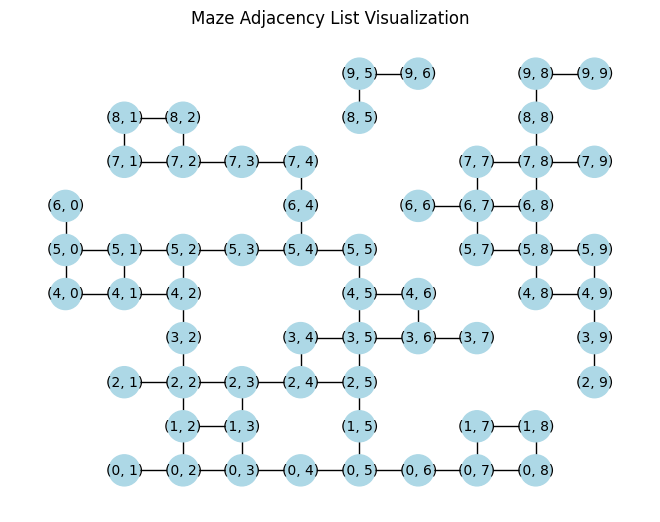

In [19]:
visualize_adjacency_list(graph)

In [34]:
visited_cells=few_shot_a_star_search.closed_list

In [35]:
visited_nodes=[]
for i in range(ROW):
    for j in range(COL):
        if visited_cells[i][j]==True:
            visited_nodes.append((i,j))

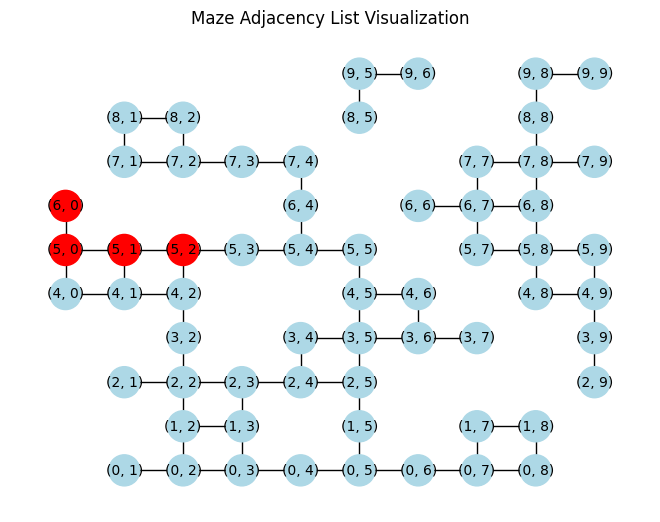

In [36]:
visualize_adjacency_list(graph, visited_nodes)